In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
df = pd.read_csv("diabetes.csv")

In [2]:
print(df.head())
print('------------------statistical measures---------------------------------')
print(df.describe())
print('--------------------rows and columns-------------------------------')
print(df.shape)
#There's no null values

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
------------------statistical measures---------------------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std

In [85]:
print("-------------------Data Info-------------------")
print(df.info())
print("-------------------Matrix Correlation-------------------")
print(df.corr())

-------------------Data Info-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
-------------------Matrix Correlation-------------------
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459  

No nules values | Only numeric data types

Glucose - BMI - Age - Pregnancies --> Features with higher correlation

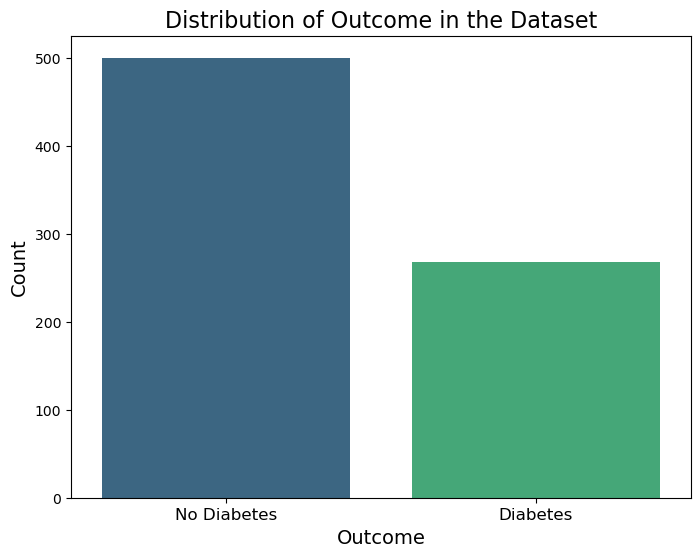

In [93]:
outcome_counts = df['Outcome'].value_counts()
# Bars plot
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="viridis")
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Outcome in the Dataset", fontsize=16)
plt.xticks([0, 1], labels=["No Diabetes", "Diabetes"], fontsize=12)
plt.show()


In [94]:
df.groupby('Outcome').mean()
# Pacients with Diabetes has higher mean value in each variable 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Outcome,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,37.067164


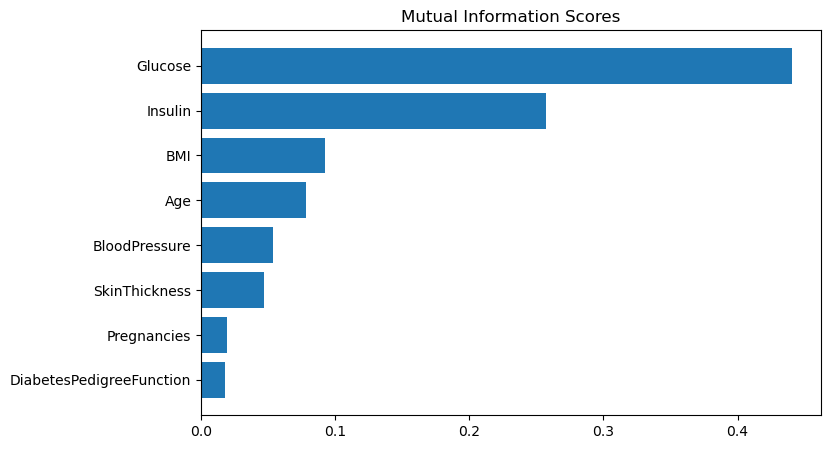

In [89]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Seleccionar las columnas discretas (enteras)
discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
def make_mi_scores(X, y, discrete_features):
    # mutual_info_regression solo acepta datos numéricos
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
# Asegúrate de que X_numeric y y sean numéricos
mi_scores = make_mi_scores(X_numeric, y, discrete_features)


As expected Glucose a strong relationship with the target (Outcome)

In [90]:
df = df.drop(columns=["DiabetesPedigreeFunction"])
## Delete this column, it's not clear utility
#Target vs Featured Variables
y = df.Outcome
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
X= df[features]
print('Correlation with OutCome:\n')
print(X.corrwith(y))
train_X,val_X,train_y,val_y = train_test_split(X,y,
                                               random_state=2,
                                               train_size=0.25)

Correlation with OutCome:

Pregnancies      0.221898
Glucose          0.466581
BloodPressure    0.065068
SkinThickness    0.074752
Insulin          0.130548
BMI              0.292695
Age              0.238356
dtype: float64
